# Import Modules

In [2]:
import numpy as np
import pandas as pd 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import matplotlib
%matplotlib inline

# Import Dataset

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70)
faces.data.shape

(1288, 2914)

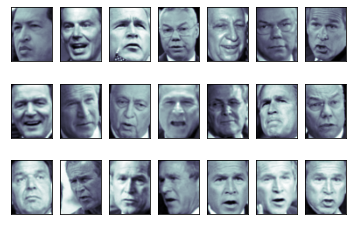

In [3]:
fig, ax = plt.subplots(3, 7, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')

# Import ISOMAP

In [4]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

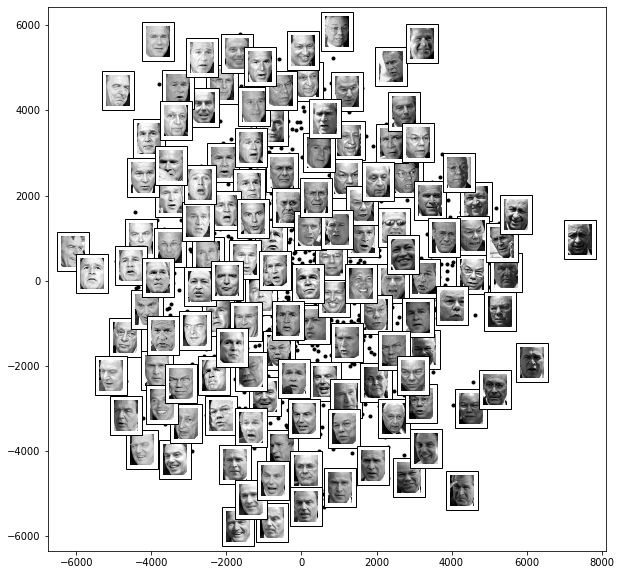

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

In [8]:
dataset = pd.read_csv("../content/HR_comma_sep.csv")

In [9]:
dataset.shape

(14999, 10)

In [10]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
dataset.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



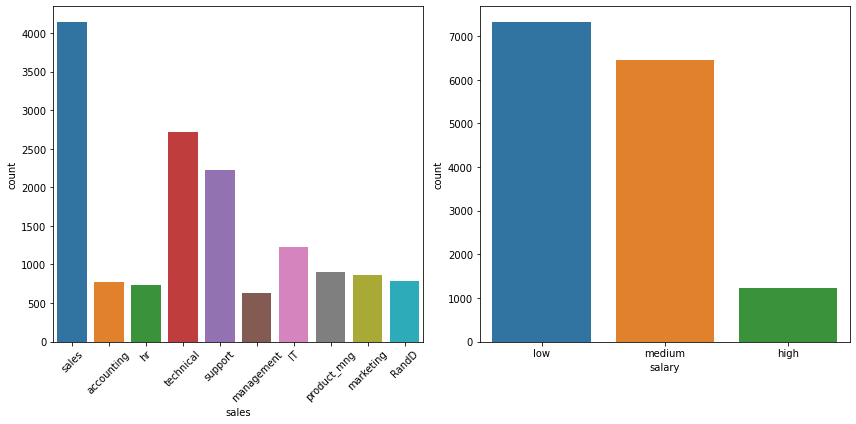

<Figure size 432x288 with 0 Axes>

In [12]:
fig, axs = plt.subplots(ncols=2,figsize=(12,6))
g = sns.countplot(dataset["sales"], ax=axs[0])
plt.setp(g.get_xticklabels(), rotation=45)
g = sns.countplot(dataset["salary"], ax=axs[1])
plt.tight_layout()
plt.show()
plt.gcf().clear()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



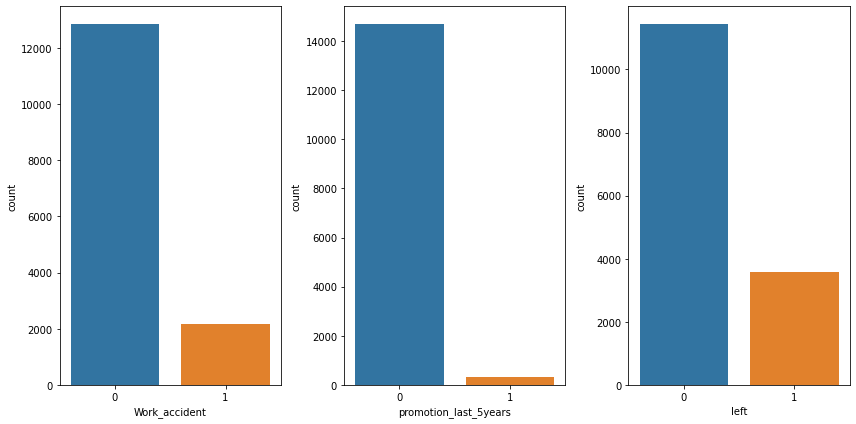

<Figure size 432x288 with 0 Axes>

In [13]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
sns.countplot(dataset["Work_accident"], ax=axs[0])
sns.countplot(dataset["promotion_last_5years"], ax=axs[1])
sns.countplot(dataset["left"], ax=axs[2])
plt.tight_layout()
plt.show()
plt.gcf().clear()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



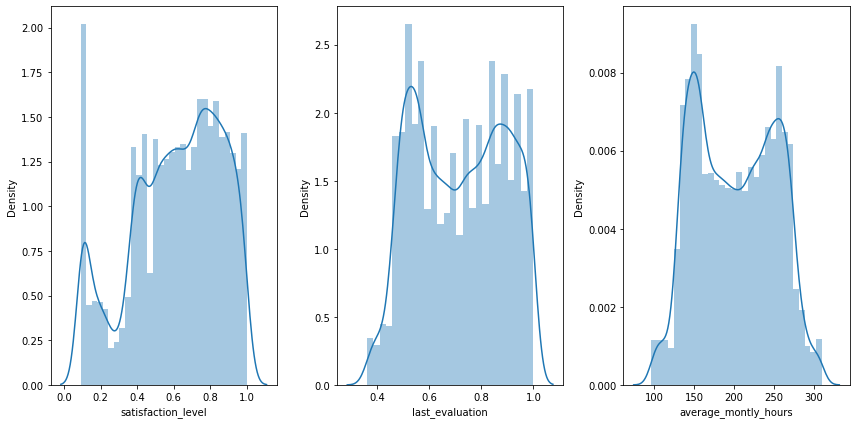

<Figure size 432x288 with 0 Axes>

In [14]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
sns.distplot(dataset["satisfaction_level"], ax=axs[0])
sns.distplot(dataset["last_evaluation"], ax=axs[1])
sns.distplot(dataset["average_montly_hours"], ax=axs[2])
plt.tight_layout()
plt.show()
plt.gcf().clear()

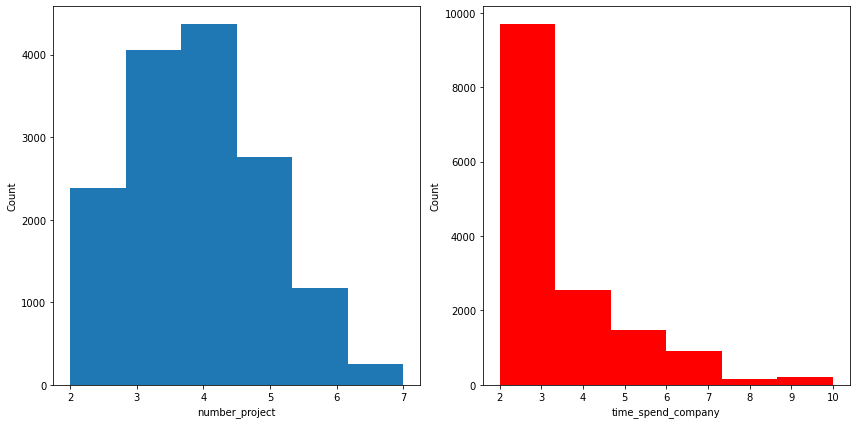

<Figure size 432x288 with 0 Axes>

In [15]:
fig, axs = plt.subplots(ncols=2,figsize=(12,6))
axs[0].hist(dataset["number_project"],bins=6)
axs[0].set_xlabel("number_project")
axs[0].set_ylabel("Count")
axs[1].hist(dataset["time_spend_company"],bins=6,color="r")
axs[1].set_xlabel("time_spend_company")
axs[1].set_ylabel("Count")
plt.tight_layout()
plt.show()
plt.gcf().clear()

In [16]:
dataset = dataset.drop(labels=["sales"],axis = 1)

In [25]:
from pandas.api.types import CategoricalDtype
dataset["salary"] = dataset["salary"].astype(CategoricalDtype(ordered = True, categories = ['low','medium','high'])).cat.codes

In [23]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [26]:
N = StandardScaler()

N.fit(dataset)

dataset_norm = N.transform(dataset)

In [27]:
index = np.random.randint(0,dataset_norm.shape[0],size=10000)

In [28]:
iso = Isomap(n_components=2, n_neighbors=40)
iso_representation = iso.fit_transform(dataset_norm[index])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



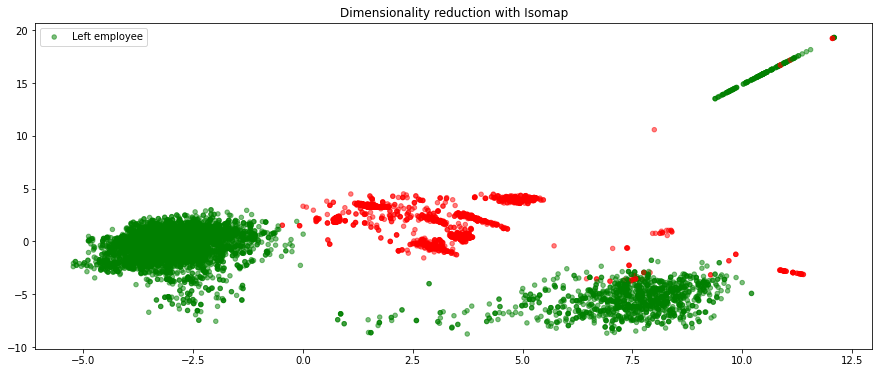

In [36]:
left_colors = dataset["left"].map(lambda s : "g" if s==0 else "r")
fig, axes = plt.subplots(1, figsize=(15,6))
plt.scatter(iso_representation[:,0],iso_representation[:,1], c = left_colors[index],alpha=0.5,s=20)
plt.title("Dimensionality reduction with Isomap")
plt.legend(["Left employee"])

In [37]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool

In [44]:
source_dataset = ColumnDataSource(
        data = dict(
            x = iso_representation[:2000,0],
            y = iso_representation[:2000,1],
            desc = dataset.loc[index,"left"],
            colors = ["#%02x%02x%02x" % (int(c*255), int((1-c)*255), 0) 
            for c in dataset.loc[index,"left"]],
            satisfaction_level = dataset.loc[index,'satisfaction_level'],
            last_evaluation = dataset.loc[index,'last_evaluation'],
            number_project = dataset.loc[index,'number_project'],
            time_spend_company = dataset.loc[index,'time_spend_company'],
            average_montly_hours = dataset.loc[index,'average_montly_hours']))
        
hover = HoverTool(tooltips=[("Left", "@desc"), 
                       ("Satisf. level", "@satisfaction_level"),
                       ("#projects", "@number_project"), 
                       ("Last eval.", "@last_evaluation"),
                       ("Time in Company", "@time_spend_company"),
                       ("Montly hrs", "@average_montly_hours")])

tools_isomap = [hover, "box_zoom",'pan', 'wheel_zoom', 'reset']

plot_isomap = figure(plot_width= 800, plot_height=600, tools=tools_isomap, 
                     title='Isomap projection of employee data')
plot_isomap.scatter('x', 'y', size=7, fill_color = "colors", line_color = None,
                    fill_alpha = 0.6, radius=0.1, alpha=0.5, line_width=0,
                    source=source_dataset)


GlyphRenderer(id='1497', ...)

In [45]:
show(plot_isomap)